# Lambda School Data Science Module 122
## Hypothesis Testing - Chi-Square Tests

#Objectives

* Expain the purpose of a chi-square test and identify appliations
* Use a chi-square test for independence to test for a statistically significant association between two categorical variables
* Use a chi-square test p-value to draw the correct conclusion about the null and alternative hypothesis


## Prepare 
In the last lecture, we learned about the t-test, which allows you to weigh evidence for or against the claim that mean of a population is equal to a reference value (the null hypothesis).

T-tests are often the appropriate statistical test when you are working with a a quantitative, continuous variable.

However, there are lots of other kinds of data and many other methods of data analysis.  For example, we might like to examine the relationship between two categorical variables.  In that case, we'd like to use a chi-square test.  "Chi-square" refers to a particular statistical distribution in the way that the t-test is called the t-test because it depends on the t-distribution.

The chi-square test works - in general - by comparing the counts that actually appear in a two-way table to the counts we would expect to see if the two variables were not related to each other at all.

[More about the Chi-square test](https://https://en.wikipedia.org/wiki/Chi-squared_test).


#A/B testing

One application of contingency tables and chi-square tests is A/B testing.

A/B testing is sometimes used in a very general sense to refer to any experiment where one group experiences one set of conditions and another group experiences another set of conditions, and we are interested in what (if any) impact that makes on a particular outcome.

Often, A/B testing is used specifically to refer to testing web site desgin to deterine if seeing one of two versions of a website drives more conversions (click throughs, sales, participation, etc.)

## Udacity Example

credit: [Udacity A/B testing final project example](https://https://www.udacity.com/course/ab-testing--ud257?irclickid=W0WQs22htxyLTIxwUx0Mo3YgUkEzM2Rn81NW2g0&irgwc=1&utm_source=affiliate&utm_medium=&aff=27795&utm_campaign=_khm68yp1xv02l1pj0mzy8__)


Udacity is an online learning platform geared toward tech professionals who want to develop skills in programming, data science, etc.  These classes are intensive - both for the students and instructors - and the learning experience is best when students are able to dedicate enough time to the classes and there is not a lot of student churn.

Udacity wished to determine if presenting potential students with a screen that would remind them of the time commitment involved in taking a class would decrease the enrollment of students who were unlikely to succeed in the class.

At the time of the experiment, when a student selected a course, she was taken to the course overview page, where the student was presented with two options: "start free trial", and "access course materials". 

If the student clicked "start free trial", she was asked to enter her credit card information and was enrolled in a free trial for the paid version of the course (which would covert to a paid membership after 14 days).

If the student clicked "access course materials", she could view the videos and take the quizzes for free but could not access all the features of the course such as coaching.




**Here's the experiment:** Udacity tested a change where if the student clicked "start free trial", she was asked how much time she had available to devote to the course. 

If the student indicated 5 or more hours per week, she would be taken through the checkout process as usual. If she indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion and suggesting that the student might like to access the course materials for free. 

At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. 

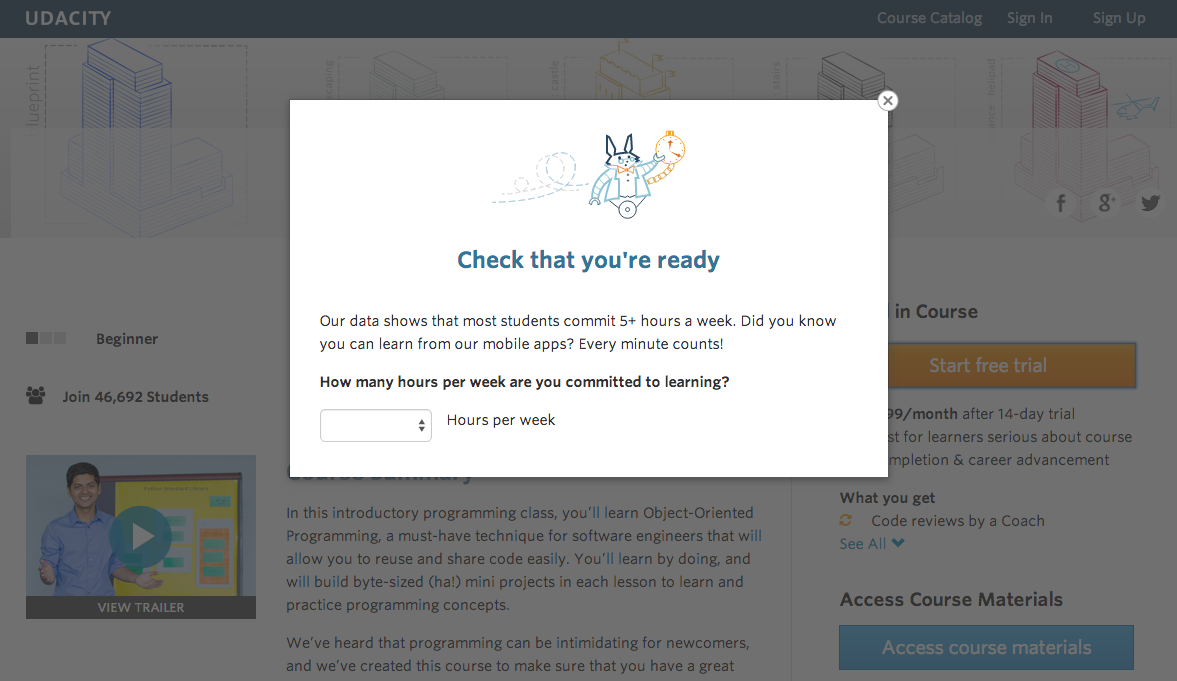

In [ ]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB%20testing%20data.csv'

ABtest_ = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(ABtest_.shape)
ABtest_.head()

Remember tidy data?  This is ___________ tidy data.  This data format will not work with the cross-tab or chi-square test functions.

The unit of observation here is the pagview and whether it resulted in a click or not.

I am not going to go through the steps I used to convert the data from a summary table to the tidy data format, but [you can see them here](https://https://colab.research.google.com/drive/1D6i7dW3amXAY6R4I-_Q7a0ginSMM1Vfu?usp=sharing). 



In [ ]:
#Import data in "tidy" by-pageview format


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB_test_clicks.csv'

ABtest = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(ABtest.shape)
ABtest.head()

Group = Control or Experimental depending on the screen viewed

Click = 0 if the individual did not click through, 1 = if the individual did click through

Our goal is to determine if there is an association between ___________.

A chi-square test *always* tests the null hypothesis that there is ___________relationship between two variables vs. the alternative hypothesis that there ___________ relationship between the two variables.


Therefore, in this exmaple

**Ho:** There ____________________ relationship between the web text and clickthroughs.

**Ha:** There _____________________ relationship between the web text and clickthroughs.

To start, let's look at the freqeuncy and relative frequency of the experimental conditions.

In [ ]:
#Frequency of experimental condition



In [ ]:
#Relative frequency of experimental condition.  Multiply by 100 to convert from
#proportions to percents





Now let's look at the freqeuncy and relative frequency of clickthroughs on this screen (ignoring what screen the potential student saw).

In [ ]:
#Frequency of survival



In [ ]:
#Relative frequency of experimental condition.  Multiply by 100 to convert from
#proportions to percents





Out of the many, many pageviews, there was a clickthrough rate of about ___________ during the time of the experiment.

If both the control group and the experimental group have a clickthrough rate of about 8.2%, we would say that the web text ___________ associated with the likelihood a person would click through.

However - for example - if the rate of clickthrough in the control group was much higher (say, 14%) than the clickthrough rate in the experimental group (say, 2%), then we'd say that the web text ___________ associated with the likelihood a person clicked through.

Now we want to look at the joint distribution of experimental condition and clickthrough.

In [ ]:
#Joint distribution



So... is there a relationship between web text and clickthroughs?  It's really hard to tell. What to do?

Let's begin by including the marginal distribution of each variable.  We actually calculated those before, but we can add them to the "margins" of the two-way table (hence the name marginal distribution) so we can view how many people clicked through and how many people were in each experiment group overall.

In [ ]:
#Marginal distribution

But what we really want to know is "Of people who saw each screen, what proportion clicked through?"  We can compare those proportions and see if they are the same or different.

We use "normalize = index" to tell Python that we want to compute the proportion of individuals who did and did not click through by the row variable (what Python calls the index variable).  

In statistical terminology, we call this the ___________.  We are computing the distribution of clickthrough *conditional* on what screen the student viewed.

In [ ]:
#Conditional distribution
#Multiply by 100 again to work with percents rather than proprotions.

Conditional_dist = pd.crosstab(index=ABtest["Group"], columns=ABtest["Click"],normalize="index")*100
                               
print(Conditional_dist)

The proportions of clickthroughs in the two groups are very similar.  However, there are so many pageviews, the difference in the clickthrough rates might be statistically significantly different.

That's where the Chi-Square test comes in.

As a refresher:

**Ho:** There ___________ relationship between screen view and clickthrough.

**Ha:** There ___________ relationship between screen view and clickthrough.

Just like in the t-test examples, if the p-value is ___________ than the significance level, we will ___________ the null hypothesis.  If the p-value is ___________ than the significance level, we will ___________ reject.

We import the chi-square function (chi2_contingency) from scipy.stats.  

**Take a very close look at the entry in the contingency table function**. It is the *table* we created above, not just the two variables of interest.

The chi2_contingency function has a lot of output, but we are most interested in the p-value, which we are calling p below.  

In [ ]:
from scipy.stats import chi2_contingency

g, p, dof, expctd = chi2_contingency(pd.crosstab(index=ABtest["Group"], columns=ABtest["Click"]))

print(p)

We ___________ the null hypothesis and conclude that there ___________ association between the screen the individual was shown and clicking through.



Note that that doesn't tell us about the rate of enrollments or payments, though.  We'll get to that later...

## Titanic Example

In the early hours of April 15, 1912, the unsinkable ship RMS Titanic sank when it struck an iceberg, killing more than half of the passengers and crew aboard. 

The Titanic.csv dataset contains demographic information for 889 of those passengers as well as a record of whether or not each passenger survived. 

Our goal is to determine if there is a relationship between ticket class and passneger survival on the Titanic.



In [ ]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Titanic.csv'

titanic = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(titanic.shape)
titanic .head()

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Survived = 0 means the passenger did not survive and 
Surivived = 1 means the passenger did survive.

Pclass = 1, 2, 3 indicates the passenger had a 1st, 2nd or 3rd class ticket, respectively.

To start, let's look at the freqeuncy and relative frequency of surival on the Titanic.

In [ ]:
#Frequency of survival



In [ ]:
#Relative frequency of survival.  Multiply by 100 to convert from
#proportions to percents




Survival results here:   


Now let's look at the frequency and relative frequency of ticket class.


In [ ]:
#Frequency and relative frequency of ticket class.

Passenger class results here: 

Now let's look at the joint distribution of survival by passenger class.  That means we want to see how many people fall into each combination of the two categories.

In [ ]:
#Joint distribution

So... is there a relationship between ticket class and survival?  

Let's begin by including the marginal distribution of each variable.  We actually calculated those before, but we can add them to the "margins" of the two-way table (hence the name marginal distribution) so we can remember how many people survived overall and how many people were in each ticket class overall.

In [ ]:
# Joint distribution with margins

But what we really want to know is "Of people in each ticket class, what proportion survived?"  We can compare those proportions and see if they are the same or different.

We use "normalize = index" to tell Python that we want to compute the proportion of individuals who did and did not survive by the row variable (what Python calls the index variable).  

In statistical terminology, we call this the conditional distribution.  We are computing the distribution of survival *conditional* on what passenger class they were in.

In [ ]:
#Conditional distribution of survival by passenger class

We observe:

But because we haven't actually computed a statistical test, we don't know for sure if there is strong evidence that there is a relationship between ticket class and survival.  That's where the Chi-Square test comes in.

As a refresher:

**Ho:** 

**Ha:** 

Just like in the t-test examples, if the p-value is less than the significance level, we will reject the null hypothesis.  If the p-value is greater than the significance level, we will fail to reject.

We import the chi-square function (chi2_contingency) from scipy.stats.  

**Take a very close look at the entry in the contingency table function**. It is the *table* we created above, not just the two variables of interest.

The chi2_contingency function has a lot of output, but we are most interested in the p-value, which we are calling p below.  

In [ ]:
from scipy.stats import chi2_contingency

#Chi-square test


P-value = 

So... we definitely think that passenger ticket class is ???

Let's make a nice visualization - a side by side bar plot - to illustrate this relationship.



First, let's take a look at our conditional distribution of survival by passenger class again.

In [ ]:
#Copy code for conditional distribution of survival by passenger class here:

We'd like to create a bar plot where we compare the percent of surivors in each passenger class.

We're going to start by creating two vectors: one for the percent of individuals who survived and one for the percent of individuals who didn't survive and plotting those with the help of some graphing parameters that are going to make everything line up nicely.

[More info about barplots](https://https://matplotlib.org/examples/api/barchart_demo.html).

In [ ]:
import matplotlib.pyplot as plt

# Need this for graphing purposes - it's the number of passenger classes
N = ## Fill in here 


Died = (## Fill in here##) # Percent that died in each ticket class
Survived = (## Fill in here##) #Percent that survived in each ticket class

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='g') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='b') #bars for survived

# add some text for labels, title and axes ticks
ax.set_ylabel('## Fill in here##')
ax.set_title('## Fill in here##')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('## Fill in here##))

ax.legend((rects1[0], rects2[0]), ('##Fill in here##'))



We can see by our lovely graph and chi-square test that:



---



Now let's look at passenger sex and survival?  Were women and children really the first ones in the lifeboats?

Note that here both child and adult males are considered male and child and adult females are considered female in the data so we really can't conclude anything about children from this analysis.


First, is a chi-square test appropriate for these data?

Answer: 

What is the distribution of passenger sex on the Titanic?

In [ ]:
#Relative frequency of gender



#Relative frequency of gender



Passengers on the Titanic were...

Refresh your memory by calculating the distribution of passenger survival.

In [ ]:
#Frequency of survival



#Relative frequency of survival



Survival results: 

Calculate the joint distribution of passenger sex and survival.  Add on the margins.  Can you draw any initial conclusions about the relationship between passenger sex and survival?

In [ ]:
#Joint distribution and joint distribution adding margins.

Results: 

Calculate the distribution of survival conditional on passenger sex.  What does this tell you?

In [ ]:
#Conditional distribution of survival by passenger sex

Results: 

Now we need to conduct the chi-square test.  What are our hypotheses?

**Ho:**

**Ha:** 

In [ ]:
#chi-square test

What is the p-value?  What do we conclude (at the 0.05 significance level) about the relationship between passenger sex and survival?

Results: 

Create a side-by-side bar plot illustrating the relationship of passenger sex and survival.  

In [ ]:
#Need this for graphing purposes - it's the number of sexes (male and female)

N = ## Fill in here ##


Died = ## Fill in here ## # Percent that died in each ticket class
Survived = ## Fill in here ## #Percent that survived in each ticket class

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='g') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='b') #bars for survived

# add some text for labels, title and axes ticks
ax.set_ylabel('##Fill in here##')
ax.set_title('##Fill in here##')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('##Fill in here##'))

ax.legend((rects1[0], rects2[0]), ('##Fill in here##))

Explain your results to someone who is interested in Titanic history but knows little about statistics.

#Determine family size on the Titanic

As a proxy, how many people have the same last name?

In [ ]:
#Print the first 5 observations
df.head()